# 约会网站配对效果数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
datingTest = pd.read_table("../datasets/datingTestSet.txt",header=None)
datingTest.head()

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [3]:
datingTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   int64  
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


In [4]:
Colors = []
for i in range(datingTest.shape[0]):
    m = datingTest.iloc[i,-1]
    if m == "didntLike":
        Colors.append("black")
    if m == "smallDoses":
        Colors.append("orange")
    if m == "largeDoses":
        Colors.append("red")    

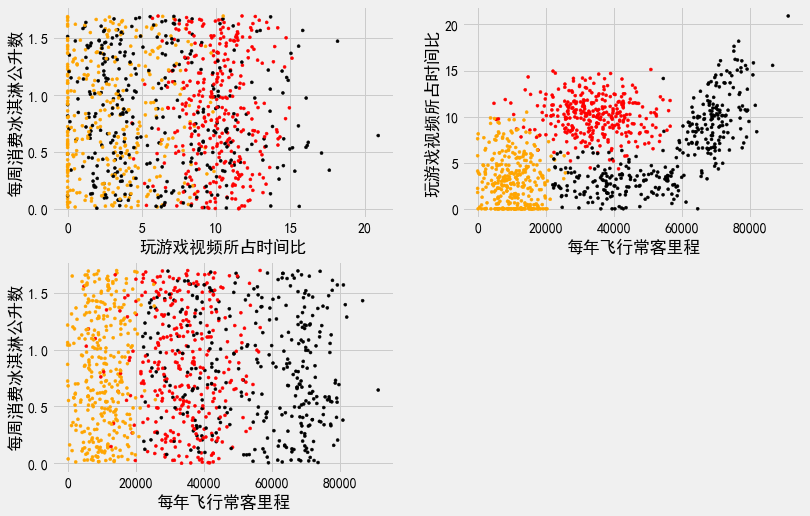

In [5]:
plt.rcParams['font.sans-serif']=['SimHei'] # 正常显示中文
plt.rcParams['axes.unicode_minus']=False # 正常显示负号

pl = plt.figure(figsize=(12,8))

fig1 = pl.add_subplot(221)
plt.scatter(datingTest.iloc[:,1],datingTest.iloc[:,2],marker=".",c=Colors)
plt.xlabel("玩游戏视频所占时间比")
plt.ylabel("每周消费冰淇淋公升数")

fig2 = pl.add_subplot(222)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,1],marker=".",c=Colors)
plt.xlabel("每年飞行常客里程")
plt.ylabel("玩游戏视频所占时间比")

fig3 = pl.add_subplot(223)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,2],marker=".",c=Colors)
plt.xlabel("每年飞行常客里程")
plt.ylabel("每周消费冰淇淋公升数")

plt.show()

In [6]:
datingTest.head()

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [7]:
from sklearn import preprocessing   #导入数据预处理模块
lbl = preprocessing.LabelEncoder()           #标签编码 实例化
datingTest.iloc[:,-1]=lbl.fit_transform(datingTest.iloc[:,-1])  
datingTest.head()

,0,1,2,3
0,40920,8.326976,0.953952,1
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,0
3,75136,13.147394,0.428964,0
4,38344,1.669788,0.134296,0


In [8]:
from sklearn.neighbors import KNeighborsClassifier                      #knn算法
from sklearn.tree import DecisionTreeClassifier                         #决策树
from sklearn.naive_bayes import GaussianNB                              #高斯贝叶斯
from sklearn.linear_model import LogisticRegression                     #逻辑回归
from sklearn.ensemble import RandomForestClassifier                     #随机森林
from sklearn.svm import SVC                                             #支持向量机

In [9]:
X = datingTest.iloc[:,:3]
y = datingTest.iloc[:,3]

In [10]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3)

In [11]:
print(Xtrain.shape)
print(Ytrain.shape)

(700, 3)
(700,)


## KNN

In [28]:
from sklearn.preprocessing import MinMaxScaler
#实现归一化
scaler = MinMaxScaler()                             #实例化
scaler = scaler.fit(X)                           #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(X)                     #通过接口导出结果
result.shape

(1000, 3)

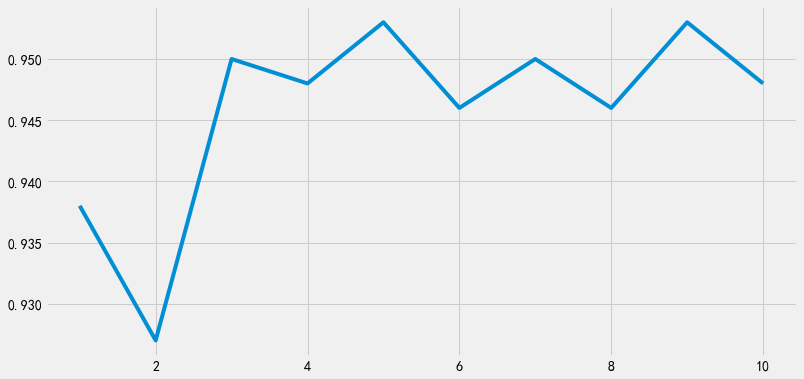

In [29]:
score=[]

for i in list(range(1,11)):
    KNN = KNeighborsClassifier(n_neighbors=i)
    CVS = cross_val_score(KNN,result,y,cv=10)   #交叉验证
    score.append(CVS.mean())
    
plt.plot([*range(1,11)],score)  # *range 激活成列表
fig = plt.gcf()
fig.set_size_inches(12,6)

In [30]:
Xtrain2,Xtest2,Ytrain2,Ytest2 = train_test_split(result,y,test_size=0.3)

In [31]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xtrain2, Ytrain2)
# Y_pred = knn.predict(Xtest)
acc_knn = round(knn.score(Xtest2, Ytest2) * 100, 2)
cross_knn = cross_val_score(knn,result,y,cv=10).mean()
print(acc_knn)
print(cross_knn)

94.67
0.953


## 决策树

In [20]:
#网格搜索
from sklearn.model_selection import GridSearchCV

# 设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}
# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)

# 输出接口  最优的取值
GR.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [24]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,
                            min_samples_leaf=3,min_samples_split=4).fit(Xtrain,Ytrain)
decision_tree.fit(Xtrain, Ytrain)
Y_pred = decision_tree.predict(Xtest)
acc_decision_tree = round(decision_tree.score(Xtest, Ytest) * 100, 2)
cross_decision_tree = cross_val_score(decision_tree,X,y,cv=10).mean()
print(acc_decision_tree)
print(cross_decision_tree)

95.67
0.961


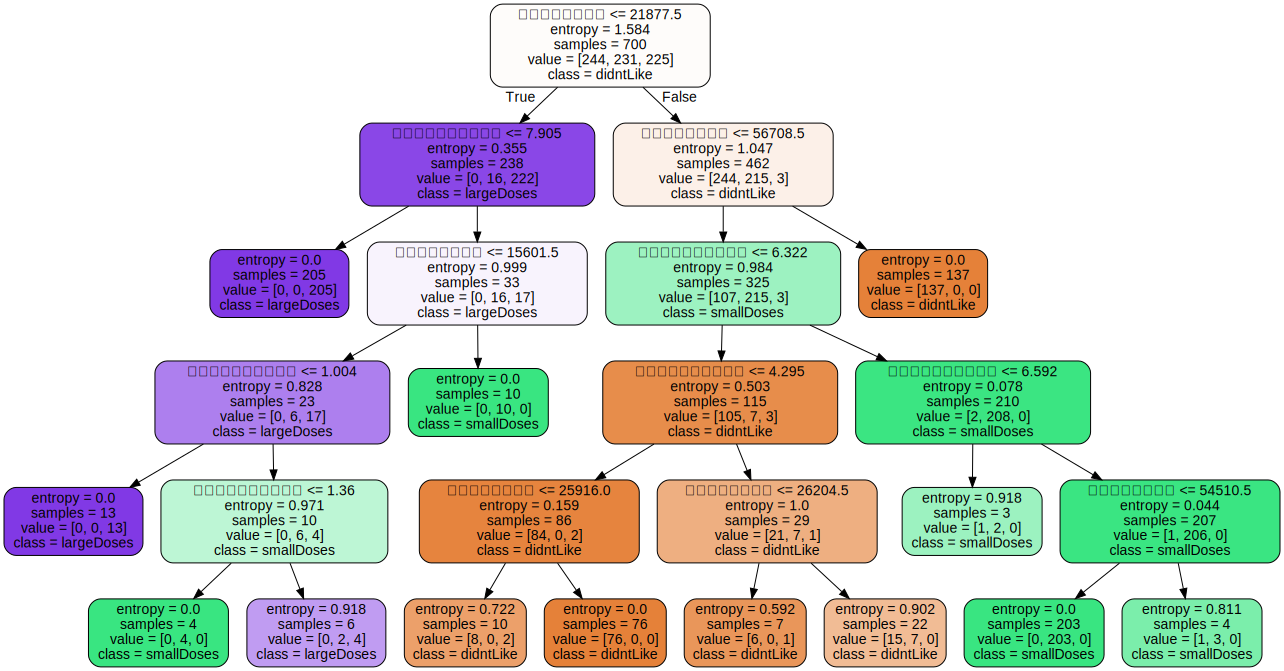

In [25]:
from sklearn import tree
feature_name = ['每年飞行常客里程','玩游戏视频所占时间比','每周消费冰淇淋公升数']
import graphviz 
dot_data = tree.export_graphviz(decision_tree
                                ,feature_names = feature_name
                                ,class_names = ["didntLike","smallDoses","largeDoses"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [61]:
with open("tree.dot", 'w',encoding='utf-8') as f:
    f = tree.export_graphviz(decision_tree
                                ,feature_names = feature_name
                                ,class_names = ["didntLike","smallDoses","largeDoses"]
                                ,filled=True
                                ,rounded=True
                                 ,out_file=f
                                )

## 随机森林

In [26]:
random_forest = RandomForestClassifier(n_estimators=60
                                        ,random_state=0)
random_forest.fit(Xtrain, Ytrain)
acc_random_forest = round(random_forest.score(Xtest, Ytest) * 100, 2)
cross_random_forest = cross_val_score(random_forest,X,y,cv=10).mean()
print(acc_random_forest)
print(cross_random_forest)

96.33
0.959


0.9557142857142858 181


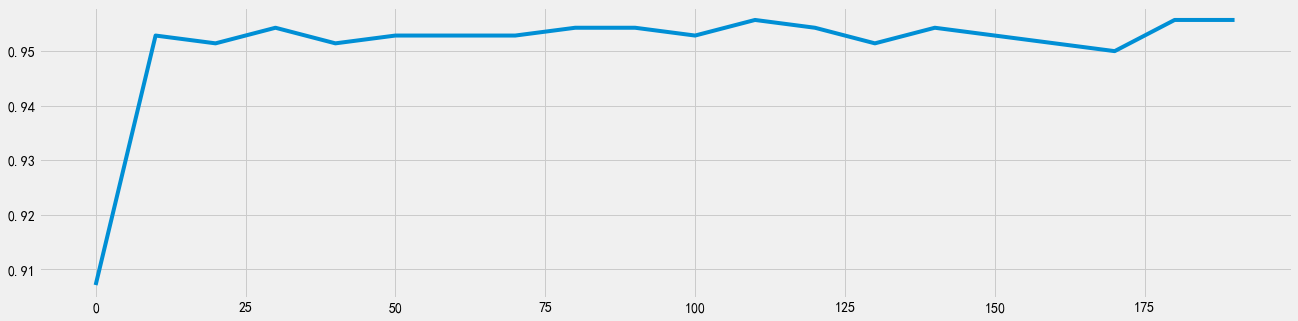

In [105]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1)
    score = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(0,200,10),scorel)
plt.show()

## 朴素贝叶斯

In [33]:
gaussian = GaussianNB()
gaussian.fit(Xtrain, Ytrain)
Y_pred = gaussian.predict(Xtest)
acc_gaussian = round(gaussian.score(Xtest, Ytest) * 100, 2)
cross_gaussian = cross_val_score(gaussian,X,y,cv=10).mean()
print(acc_gaussian)
print(cross_gaussian)

92.33
0.9339999999999999


## 逻辑回归

In [36]:
logreg = LogisticRegression(max_iter=1000)#penalty="l2",solver="liblinear",C=0.5,max_iter=1000
logreg.fit(Xtrain, Ytrain)
Y_pred = logreg.predict(Xtest)
acc_log = round(logreg.score(Xtest, Ytest) * 100, 2)
cross_log = cross_val_score(logreg,X,y,cv=10).mean()
print(acc_log)
print(cross_log)       

59.0
0.805


## 支持向量机

In [38]:
from time import time #随时监控我们的模型的运行时间
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ,decision_function_shape='ovr'
             ,C=0.8
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest) #获取模型的预测结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    acc_svm = round(score * 100, 2)
    cross_svm = cross_val_score(clf,X,y,cv=10).mean()
    print(acc_svm)
    print(cross_svm)
#     recall = recall_score(Ytest, result)
#     auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
#     print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

91.33
0.913
03:51:005314
90.67
0.915
07:26:296999
34.67
0.359
07:27:181632
32.67
0.27199999999999996
07:27:456416


In [37]:
clf = SVC(kernel = "linear"
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ,decision_function_shape='ovr'
             ,C=0.8
             ).fit(Xtrain, Ytrain)
score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
acc_svm = round(score * 100, 2)
cross_svm = cross_val_score(clf,X,y,cv=10).mean()
print(acc_svm)
print(cross_svm)  

91.33
0.913


In [39]:
models = pd.DataFrame({
    'Model': [ 'KNN','Logistic Regression','GaussianNB',
              'Random Forest','Decision Tree','SVM'],
    'Score': [acc_knn,acc_log,acc_gaussian,
              acc_random_forest,acc_decision_tree,acc_svm]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,96.33
4,Decision Tree,95.67
0,KNN,94.67
2,GaussianNB,92.33
1,Logistic Regression,59.00
5,SVM,32.67
